In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [2]:
#1.IMPORTING DATA FROM URL
Url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(Url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
#2. HIGH LEVEL DATA UNDERSTANDING:
#2.1 Find no. of rows & columns in the dataset
df.shape

(57394, 49)

In [4]:
#2.2 Data types of columns.
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [5]:
#2.3 Info & describe of data in dataframe.
print("info of covid data:",df.info(),"\n","Describe of covid data:",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
#3. Low Level Data Understanding :
#3.1 Find count of unique values in location column.
len(pd.unique(df['location']))

216

In [7]:
#3.2 Find which continent has maximum frequency using values
maximum_frequence=df['continent'].value_counts()
print("maximum frequence Continent:",maximum_frequence[0])

maximum frequence Continent: 14828


In [8]:
#3.3 Find maximum & mean value in 'total_cases'.
print(df['total_cases'].max())
print(df['total_cases'].min())

55154651.0
1.0


In [9]:
#3.4 Find 25%,50% & 75% quartile value in 'total_deaths'.
print(df.total_deaths.quantile([0.25,0.50,0.75]))

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [10]:
#3.5 Find which continent has maximum 'human_development_index'.
df[df["human_development_index"] == df["human_development_index"].max()].head(1)["continent"]

38632    Europe
Name: continent, dtype: object

In [11]:
#3.6 Find which continent has minimum 'gdp_per_capita'.
print("continent that has maximum 'gdp_per_capita':", df[df['gdp_per_capita'] == df['gdp_per_capita'].min()].continent.unique())

continent that has maximum 'gdp_per_capita': ['Africa']


In [12]:
#4. Filter the dataframe with only this columns
#4.1 ['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and update the data frame.
df = df.filter(['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'])
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


In [14]:
#5. Data Cleaning
#5.1 Remove all duplicates observations
df.drop_duplicates(keep=False,inplace=True)
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


In [15]:
#5.2 Find missing values in all columns
df.isnull()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,False,False,False,True,True,False,False
1,False,False,False,True,True,False,False
2,False,False,False,True,True,False,False
3,False,False,False,True,True,False,False
4,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...
57389,True,False,False,False,False,True,True
57390,True,False,False,False,False,True,True
57391,True,False,False,False,False,True,True
57392,True,False,False,False,False,True,True


In [16]:
#5.3 Remove all observations where continent column value is missing
df = df[df.continent != 0]
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [17]:
#5.4 Fill all missing values with 0
df.fillna(0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000
57390,0,International,14/11/20,696.0,7.0,0.000,0.000
57391,0,International,15/11/20,696.0,7.0,0.000,0.000
57392,0,International,16/11/20,696.0,7.0,0.000,0.000


In [18]:
#6 Date time format :
#6.1  Convert date column in datetime format using pandas.to_datetime
df["date"]=pd.to_datetime(df["date"])

In [19]:
df.dtypes["date"]

dtype('<M8[ns]')

In [19]:
#6.2 Create new column month after extracting month data from date column.
df["month"]=df["date"].dt.month
df.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 float64
icu_patients_per_million                     f

In [20]:
#7 Data Aggregation:
#7.1 Find max value in all columns using groupby function on 'continent' column
df.groupby(['continent']).max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843


In [21]:
#7.2 Store the result in a new dataframe named 'df_groupby'.
df_groupby = df.groupby(['continent']).max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843


In [22]:
#8 Feature Engineering :
#8.1 Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby["total_deaths_to_total_cases"]=(df_groupby["total_deaths"]/df_groupby["total_cases"])*100
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,2.700364
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,1.470754
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,2.618830
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,2.206241
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,3.268468
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,2.825066


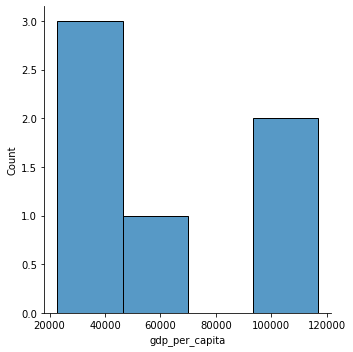

In [23]:
#9 Data Visualization :
#9.1 Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
displot = sns.displot(df_groupby['gdp_per_capita'])
displot.savefig("9a_displot.png")

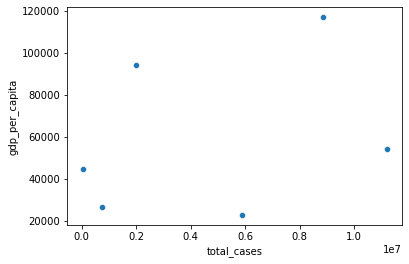

In [24]:
#9.2 Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
scatterplot = sns.scatterplot(data=df_groupby, x='total_cases', y='gdp_per_capita')
fig = scatterplot.get_figure()
fig.savefig("9b_scatterplot.png")

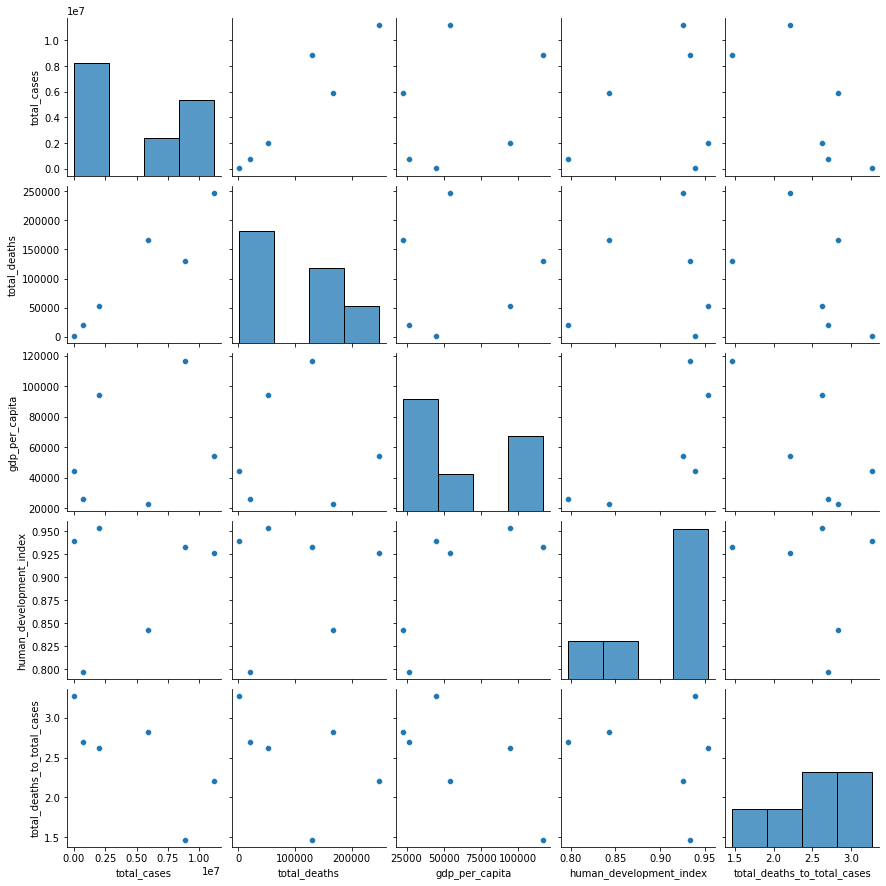

In [27]:
#9.3 Plot Pairplot on df_groupby dataset.
fig = sns.pairplot(df_groupby)
fig.savefig("9c_pairplot.png")

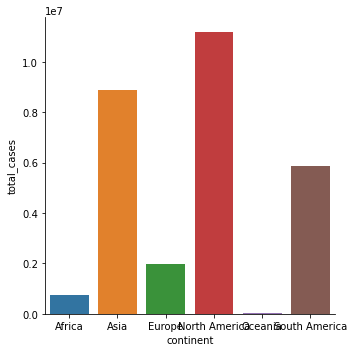

In [25]:
#9.4 Plot a bar plot of 'continent' column with 'total_cases' .
sns.catplot(data=df_groupby,x="continent",y="total_cases",kind="bar")

In [26]:
#10 Save the df_groupby dataframe in your local drive using pandas.to_csv function .
df_groupby.to_csv('df_groupby.csv')